# 🎨 범용 동화 표지 이미지 생성기
## Imagen 4.0 Fast - 텍스트 완전 제거 버전

**특징:**
- ✅ 어떤 동화 JSON이든 자동 분석
- ✅ 텍스트 완전 제거 (깔끔한 일러스트만)
- ✅ 아동용 동화 표지 스타일 강조
- ✅ W:149 × H:120 크기 자동 생성

**사용 방법:**
1. 동화 JSON 업로드
2. Gemini API 키 입력
3. 자동 표지 생성
4. 다운로드

## 1단계: 라이브러리 설치

In [1]:
!pip install google-generativeai pillow -q

import json
import os
from getpass import getpass
import google.generativeai as genai
from PIL import Image
import io
from google.colab import files

print("✅ 라이브러리 설치 완료")

✅ 라이브러리 설치 완료


## 2단계: Gemini API 설정

In [2]:
# Gemini API 키 입력
GEMINI_API_KEY = getpass("Gemini API Key (AI...): ")
genai.configure(api_key=GEMINI_API_KEY)

print("✅ Gemini API 설정 완료")

Gemini API Key (AI...): ··········
✅ Gemini API 설정 완료


## 3단계: 동화 JSON 업로드

In [3]:
# JSON 파일 업로드
print("📂 동화 JSON 파일을 업로드하세요:")
uploaded = files.upload()

# 업로드된 파일 이름 가져오기
json_filename = list(uploaded.keys())[0]
print(f"\n✅ 업로드 완료: {json_filename}")

# JSON 파일 읽기
with open(json_filename, 'r', encoding='utf-8') as f:
    story_data = json.load(f)

# 동화 정보 출력
print("\n📖 동화 정보:")
print(f"제목: {story_data['story_info']['title']}")
if 'theme' in story_data['story_info']:
    print(f"테마: {story_data['story_info']['theme']}")
print(f"키워드: {', '.join(story_data['story_info']['keywords'])}")
print(f"줄거리: {story_data['story_info']['summary'][:100]}...")

📂 동화 JSON 파일을 업로드하세요:


Saving 유민이의_특별한_한복_찾기_20251207_2253_with_cover.json to 유민이의_특별한_한복_찾기_20251207_2253_with_cover.json

✅ 업로드 완료: 유민이의_특별한_한복_찾기_20251207_2253_with_cover.json

📖 동화 정보:
제목: 유민이의 특별한 한복 찾기
테마: 따뜻하고 신비로운 분위기
키워드: 동대문 시장, 한복, 전통 장신구
줄거리: 유민이는 동대문 시장을 방문하여 엄마와 함께 한복 가게를 둘러보던 중, 반짝이는 노리개를 발견한다. 그 노리개를 만지자마자 유민은 꿈속에서 아름다운 한복을 입은 자신을 발견하게 되...


## 4단계: 범용 표지 생성 함수

In [11]:
def generate_universal_cover(story_data, output_path="cover_image.png"):
    """
    범용 동화 표지 생성 - 완전 텍스트 제거 버전
    """
    print("\n🎨 [표지 이미지 생성 시작]")
    print("="*70)

    # 동화 분석
    title = story_data['story_info']['title']
    analysis = analyze_story_for_image(story_data)

    print(f"📖 제목: {title}")
    print(f"👤 주인공: {analysis['character']}")
    print(f"🎭 시대: {analysis['era']}")
    print(f"💫 분위기: {analysis['mood']}")

    # 🔥 텍스트 생성을 유도하는 단어 완전 제거
    # "book cover", "fairy tale" 같은 표현 삭제
    image_prompt = f"""
A beautiful watercolor illustration painting of {analysis['character']}.

Character: Wearing traditional colorful hanbok (Korean traditional dress) with vibrant colors - pink and blue. Joyful happy expression with sparkling bright eyes and gentle smile.

Setting: {analysis['era_desc']} with soft atmospheric background

Background style: Dreamy soft-focus bokeh effect, warm pastel gradient colors (pink, peach, soft yellow), subtle abstract traditional Korean decorative patterns, gentle magical glow

Mood: {analysis['mood']}, whimsical enchanting atmosphere

Art technique: Professional watercolor illustration painting, soft gentle brushstrokes, warm color palette, storybook art quality for young children

Composition: Portrait-style close-up focusing on the character's face and upper body, centered composition with atmospheric dreamy background

Image quality: High resolution professional artwork suitable for ages 3-7

ABSOLUTELY CRITICAL REQUIREMENT - READ CAREFULLY:
This is a pure illustration painting WITHOUT any text elements.
NO text of any kind.
NO Korean hangul characters (한글).
NO English letters or alphabet.
NO numbers or symbols.
NO signs, banners, or labels with writing.
All surfaces must be completely blank without any readable text.
This is a clean visual artwork only - pure illustration without typography.
Do not add title, do not add words, keep all areas text-free.
"""

    print("\n📝 텍스트 제거 강화 프롬프트 생성 완료")
    print("-"*70)

    try:
        print("⏳ Imagen 4.0 Fast로 이미지 생성 중... (30-60초 소요)")

        import requests
        import base64

        # REST API 호출
        api_key = GEMINI_API_KEY
        url = f"https://generativelanguage.googleapis.com/v1beta/models/imagen-4.0-fast-generate-001:predict?key={api_key}"

        payload = {
            "instances": [{
                "prompt": image_prompt
            }],
            "parameters": {
                "sampleCount": 1,
                "aspectRatio": "3:4"
            }
        }

        headers = {"Content-Type": "application/json"}
        response = requests.post(url, json=payload, headers=headers, timeout=90)

        if response.status_code == 200:
            result = response.json()

            if 'predictions' in result and len(result['predictions']) > 0:
                prediction = result['predictions'][0]

                # 이미지 데이터 추출
                image_b64 = None
                for key in ['bytesBase64Encoded', 'image', 'imageData', 'data']:
                    if key in prediction:
                        image_b64 = prediction[key]
                        print(f"✅ 이미지 데이터 추출 성공")
                        break

                if image_b64:
                    # Base64 디코딩 및 PIL Image 변환
                    image_bytes = base64.b64decode(image_b64)
                    pil_image = Image.open(io.BytesIO(image_bytes))

                    print(f"✅ 원본 이미지 생성 완료 (크기: {pil_image.size})")

                    # 149 x 120 크기로 리사이즈
                    resized_image = pil_image.resize((315, 424), Image.Resampling.LANCZOS)
                    resized_image.save(output_path, format='PNG', quality=95)

                    print(f"✅ 리사이즈 완료: {resized_image.size} (W:315, H:424)")
                    print(f"💾 저장 완료: {output_path}")
                    print("="*70)

                    # 미리보기
                    print("\n📷 생성된 표지 이미지:")
                    display(resized_image)

                    return output_path, resized_image
                else:
                    raise Exception("이미지 데이터를 찾을 수 없습니다")
            else:
                raise Exception("API 응답에 이미지가 없습니다")
        else:
            error_msg = response.text
            print(f"❌ API 오류 {response.status_code}:")
            print(error_msg)
            raise Exception(f"API 호출 실패")

    except Exception as e:
        print(f"\n❌ 이미지 생성 실패: {e}")

        import traceback
        print("\n🔍 상세 오류:")
        print(traceback.format_exc())

        # 대체 이미지
        print("\n⚠️ 임시 대체 이미지 생성...")
        blank_image = Image.new('RGB', (315, 424), color=(255, 240, 245))
        blank_image.save(output_path, format='PNG')

        return output_path, blank_image

print("✅ 텍스트 제거 강화 버전 함수 정의 완료")

✅ 텍스트 제거 강화 버전 함수 정의 완료


## 5단계: 표지 이미지 생성 실행


🎨 [표지 이미지 생성 시작]
📖 제목: 유민이의 특별한 한복 찾기
👤 주인공: a young Korean girl
🎭 시대: modern Korea
💫 분위기: adventurous and exciting

📝 텍스트 제거 강화 프롬프트 생성 완료
----------------------------------------------------------------------
⏳ Imagen 4.0 Fast로 이미지 생성 중... (30-60초 소요)
✅ 이미지 데이터 추출 성공
✅ 원본 이미지 생성 완료 (크기: (896, 1280))
✅ 리사이즈 완료: (315, 424) (W:315, H:424)
💾 저장 완료: cover_유민이의_특별한_한복_찾기.png

📷 생성된 표지 이미지:


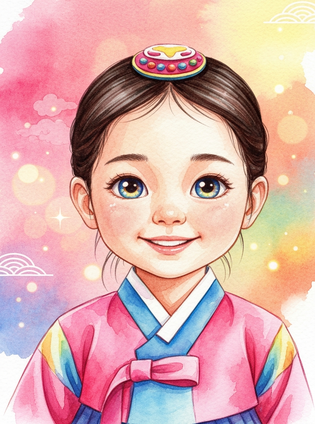


🎉 완료!
📁 파일명: cover_유민이의_특별한_한복_찾기.png


In [12]:
# 출력 파일명 생성
title = story_data['story_info']['title']
safe_title = "".join([c if c.isalnum() or c in ['_', '-'] else "_" for c in title])
cover_filename = f"cover_{safe_title}.png"

# 표지 이미지 생성 실행
cover_path, cover_image = generate_universal_cover(story_data, cover_filename)

print("\n🎉 완료!")
print(f"📁 파일명: {cover_path}")

## 6단계: JSON에 표지 경로 추가

In [6]:
# JSON에 표지 이미지 경로 추가
if 'metadata' not in story_data:
    story_data['metadata'] = {}

story_data['metadata']['cover_image'] = cover_filename
if 'version' in story_data['metadata']:
    story_data['metadata']['version'] = story_data['metadata']['version'].replace('v1.0', 'v1.1') + '_with_Imagen4'
else:
    story_data['metadata']['version'] = 'v1.1_with_Imagen4'

# 업데이트된 JSON 저장
updated_json_filename = json_filename.replace('.json', '_with_cover.json')

with open(updated_json_filename, 'w', encoding='utf-8') as f:
    json.dump(story_data, f, ensure_ascii=False, indent=4)

print(f"✅ 업데이트된 JSON 저장 완료: {updated_json_filename}")
print(f"📷 표지 이미지 경로: {story_data['metadata']['cover_image']}")

✅ 업데이트된 JSON 저장 완료: 유민이의_특별한_한복_찾기_20251207_2253_with_cover_with_cover.json
📷 표지 이미지 경로: cover_유민이의_특별한_한복_찾기.png


## 7단계: 파일 다운로드

In [10]:
# 표지 이미지 다운로드
print("📥 표지 이미지 다운로드 중...")
files.download(cover_filename)

# 업데이트된 JSON 다운로드
print("📥 업데이트된 JSON 다운로드 중...")
files.download(updated_json_filename)

print("\n✅ 모든 파일 다운로드 완료!")

📥 표지 이미지 다운로드 중...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📥 업데이트된 JSON 다운로드 중...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ 모든 파일 다운로드 완료!


---

## 📝 사용 팁

### 이 노트북의 특징:

1. **자동 분석**: JSON 내용을 자동으로 분석해서 적절한 이미지 생성
2. **텍스트 제거**: 완전히 깨끗한 일러스트만 생성 (제목/글자 없음)
3. **범용성**: 어떤 한국 동화 JSON이든 작동
4. **아동용 강조**: 3-7세 아동 대상 동화책 스타일

### 자동으로 파악되는 요소:

- **주인공 성별**: 소녀/소년 자동 감지
- **시대 배경**: 조선시대/근대/현대 자동 감지
- **분위기**: 모험/신비/따뜻함 자동 감지
- **한국 요소**: 한복, 전통 소품 자동 추출

### 표지에 제목을 추가하고 싶다면:

**권장 방법**: 프론트엔드에서 텍스트 오버레이
```javascript
// React Native 예시
<View style={styles.cover}>
  <Image source={{uri: cover_image_url}} />
  <Text style={styles.title}>{story_title}</Text>
</View>
```

이렇게 하면:
- ✅ 제목 폰트/크기/색상 자유롭게 조정
- ✅ 다국어 지원 가능
- ✅ 이미지는 깨끗하게 재사용 가능
